# ICFES Data Analysis

The test used to measure the quality of undergraduate education in Colombia is named "Saber - Pro". This test was used to evaluate post-secondary education from 2003.

This test measures generic competencies, such as quantitative reasoning, critical lecture, writing communication, English, and citizen competencies. And specific competencies for the career of the student.

The ICFES shares this information, related to personal, academic, and socioeconomic information in order to propose ways to enhance the post-secondary education quality in the country.

The public information shared by the institute can be found here.
https://www.icfes.gov.co/data-icfes

Therefore I will analyze the data related to this exam in order to answer the following questions:

<br>1)Which are the socio-demographic variables that most influence the results in the test?</br>
<br>2)Is the city where people live related to their scores?</br>
<br>3)What are the top 20 universities?</br>


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from datetime import datetime
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

## A Look at the Data

In order to get a better understanding of the data we will be looking at throughout this lesson, let's take a look at some of the characteristics of the dataset.

First, let's read in the data and necessary libraries.

In [2]:
#Load information 
Data2022_2 = pd.read_csv('DATA_ICFES_SABERPROPROFESIONAL_2022-2.TXT',error_bad_lines=False,delimiter='¬')

<ipython-input-2-2fb5752fb8a6>:2: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  Data2022_2 = pd.read_csv('DATA_ICFES_SABERPROPROFESIONAL_2022-2.TXT',error_bad_lines=False,delimiter='¬')
Skipping line 6: '¬' expected after '"'
Skipping line 409: '¬' expected after '"'
Skipping line 822: '¬' expected after '"'
Skipping line 5113: '¬' expected after '"'
Skipping line 5264: '¬' expected after '"'
Skipping line 8083: '¬' expected after '"'
Skipping line 9675: '¬' expected after '"'
Skipping line 10470: '¬' expected after '"'
Skipping line 11713: '¬' expected after '"'
Skipping line 12840: '¬' expected after '"'
Skipping line 15663: '¬' expected after '"'
Skipping line 20847: '¬' expected after '"'
Skipping line 22146: '¬' expected after '"'
Skipping line 22710: '¬' expected after '"'
Skipping line 24397: '¬' expected a

**1.** Number of rows and columns.

In [3]:
print ("2022_2:" + str(Data2022_2.shape))

2022_2:(127283, 109)


**2.** Which columns had no missing values? Provide a set of column names that have no missing values.

In [4]:
print (Data2022_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127283 entries, 0 to 127282
Columns: 109 entries, ESTU_TIPODOCUMENTOÂ to ESTU_ESTADOINVESTIGACION
dtypes: object(109)
memory usage: 105.8+ MB
None


In [5]:
print(Data2022_2.head())

  ESTU_TIPODOCUMENTOÂ ESTU_NACIONALIDADÂ ESTU_GENEROÂ ESTU_FECHANACIMIENTOÂ  \
0                 CEÂ           ECUADORÂ           MÂ           24/12/1998Â   
1                 CCÂ          COLOMBIAÂ           FÂ           11/09/2001Â   
2                 CCÂ          COLOMBIAÂ           MÂ           10/09/2001Â   
3                 CCÂ          COLOMBIAÂ           FÂ           16/03/1993Â   
4                 CCÂ          COLOMBIAÂ           MÂ           20/10/1998Â   

  ESTU_EXTERIORÂ PERIODOÂ ESTU_CONSECUTIVOÂ ESTU_ESTUDIANTEÂ  \
0            NOÂ   20225Â   EK202250120952Â      ESTUDIANTEÂ   
1            NOÂ   20225Â   EK202250088428Â      ESTUDIANTEÂ   
2            NOÂ   20225Â   EK202250166006Â      ESTUDIANTEÂ   
3            NOÂ   20225Â   EK202250101378Â      ESTUDIANTEÂ   
4            NOÂ   20225Â   EK202250199757Â      ESTUDIANTEÂ   

  ESTU_PAIS_RESIDEÂ ESTU_TIENEETNIAÂ  ... MOD_COMUNI_ESCRITA_DESEMÂ  \
0          ECUADORÂ              NoÂ  ...                        3Â  

In [6]:
most_missing_cols = []
for i in Data2022_2.columns:
    if Data2022_2[i].isnull().sum()/len(Data2022_2[i])>0.75:
        most_missing_cols.append(i)

In [7]:
most_missing_cols

[]

There are not columns with more than 75% nan values.

In [8]:
Data2022_2.head()

,ESTU_TIPODOCUMENTOÂ,ESTU_NACIONALIDADÂ,ESTU_GENEROÂ,ESTU_FECHANACIMIENTOÂ,ESTU_EXTERIORÂ,PERIODOÂ,ESTU_CONSECUTIVOÂ,ESTU_ESTUDIANTEÂ,ESTU_PAIS_RESIDEÂ,ESTU_TIENEETNIAÂ,...,MOD_COMUNI_ESCRITA_DESEMÂ,MOD_COMUNI_ESCRITA_PNALÂ,MOD_COMUNI_ESCRITA_PNBCÂ,PUNT_GLOBALÂ,PERCENTIL_GLOBALÂ,PERCENTIL_NBCÂ,ESTU_INSE_INDIVIDUALÂ,ESTU_NSE_INDIVIDUALÂ,ESTU_NSE_IESÂ,ESTU_ESTADOINVESTIGACION
0,CEÂ,ECUADORÂ,MÂ,24/12/1998Â,NOÂ,20225Â,EK202250120952Â,ESTUDIANTEÂ,ECUADORÂ,NoÂ,...,3Â,81Â,82Â,174Â,86Â,86Â,52.3042986040786Â,2Â,3Â,PUBLICAR
1,CCÂ,COLOMBIAÂ,FÂ,11/09/2001Â,NOÂ,20225Â,EK202250088428Â,ESTUDIANTEÂ,COLOMBIAÂ,NoÂ,...,3Â,74Â,76Â,152Â,59Â,76Â,57.2411574258929Â,3Â,2Â,PUBLICAR
2,CCÂ,COLOMBIAÂ,MÂ,10/09/2001Â,NOÂ,20225Â,EK202250166006Â,ESTUDIANTEÂ,COLOMBIAÂ,NoÂ,...,3Â,76Â,82Â,151Â,59Â,72Â,48.3947073657689Â,2Â,2Â,PUBLICAR
3,CCÂ,COLOMBIAÂ,FÂ,16/03/1993Â,NOÂ,20225Â,EK202250101378Â,ESTUDIANTEÂ,COLOMBIAÂ,NoÂ,...,2Â,28Â,29Â,122Â,19Â,31Â,34.3247720250522Â,1Â,4Â,PUBLICAR
4,CCÂ,COLOMBIAÂ,MÂ,20/10/1998Â,NOÂ,20225Â,EK202250199757Â,ESTUDIANTEÂ,COLOMBIAÂ,NoÂ,...,3Â,80Â,82Â,179Â,90Â,91Â,58.3940037174097Â,3Â,3Â,PUBLICAR


In [9]:
Data2022_2.columns

Index(['ESTU_TIPODOCUMENTOÂ', 'ESTU_NACIONALIDADÂ', 'ESTU_GENEROÂ',
       'ESTU_FECHANACIMIENTOÂ', 'ESTU_EXTERIORÂ', 'PERIODOÂ',
       'ESTU_CONSECUTIVOÂ', 'ESTU_ESTUDIANTEÂ', 'ESTU_PAIS_RESIDEÂ',
       'ESTU_TIENEETNIAÂ',
       ...
       'MOD_COMUNI_ESCRITA_DESEMÂ', 'MOD_COMUNI_ESCRITA_PNALÂ',
       'MOD_COMUNI_ESCRITA_PNBCÂ', 'PUNT_GLOBALÂ', 'PERCENTIL_GLOBALÂ',
       'PERCENTIL_NBCÂ', 'ESTU_INSE_INDIVIDUALÂ', 'ESTU_NSE_INDIVIDUALÂ',
       'ESTU_NSE_IESÂ', 'ESTU_ESTADOINVESTIGACION'],
      dtype='object', length=109)

In [10]:
df=Data2022_2[['ESTU_GENEROÂ','ESTU_TIENEETNIAÂ','ESTU_DEPTO_RESIDEÂ','ESTU_ESTADOCIVILÂ'
               ,'ESTU_VALORMATRICULAUNIVERSIDADÂ','ESTU_PAGOMATRICULABECAÂ','ESTU_COMOCAPACITOEXAMENSB11Â'
               ,'ESTU_CURSODOCENTESIESÂ','ESTU_CURSOIESAPOYOEXTERNOÂ','ESTU_CURSOIESEXTERNAÂ', 'ESTU_SIMULACROTIPOICFESÂ','ESTU_ACTIVIDADREFUERZOAREASÂ'
               ,'ESTU_ACTIVIDADREFUERZOGENERICÂ','ESTU_SEMESTRECURSAÂ','FAMI_EDUCACIONPADREÂ','FAMI_EDUCACIONMADREÂ','FAMI_OCUPACIONPADREÂ','FAMI_OCUPACIONMADREÂ'
               ,'FAMI_ESTRATOVIVIENDAÂ','FAMI_TIENEINTERNETÂ','FAMI_TIENECOMPUTADORÂ','FAMI_TIENELAVADORAÂ','FAMI_TIENEHORNOMICROOGASÂ','FAMI_TIENESERVICIOTVÂ'
               ,'FAMI_TIENEAUTOMOVILÂ','FAMI_TIENEMOTOCICLETAÂ','FAMI_TIENECONSOLAVIDEOJUEGOSÂ','FAMI_TRABAJOLABORPADREÂ','FAMI_TRABAJOLABORMADREÂ'
               ,'ESTU_PLANTELEDUCATIVOÂ','ESTU_PREGRADOEXAMENSPÂ','ESTU_UNPOSTGRADOÂ','ESTU_HORASSEMANATRABAJAÂ','FAMI_CUANTOSCOMPARTEBAÃ‘OÂ','ESTU_PAGOMATRICULAÂ'
               ,'ESTU_VLRULTIMOSEMESCURSADOÂ','ESTU_PRESENTACIONCASAÂ','INST_NOMBRE_INSTITUCIONÂ'
               ,'GRUPOREFERENCIAÂ','ESTU_PRGM_CODMUNICIPIOÂ','ESTU_NIVEL_PRGM_ACADEMICOÂ','ESTU_METODO_PRGMÂ','ESTU_NUCLEO_PREGRADOÂ','INST_CARACTER_ACADEMICOÂ','ESTU_PRIVADO_LIBERTADÂ'
               ,'PUNT_GLOBALÂ']]

In [11]:
# General review of the target variable
#Replace the special characters
df=df.replace('Â','',regex=True)
df=df.replace('�','',regex=True)
df=df.replace('©','',regex=True)
df=df.replace('³','',regex=True)
df=df.replace('Ã','',regex=True)

In [12]:
df.head()

,ESTU_GENEROÂ,ESTU_TIENEETNIAÂ,ESTU_DEPTO_RESIDEÂ,ESTU_ESTADOCIVILÂ,ESTU_VALORMATRICULAUNIVERSIDADÂ,ESTU_PAGOMATRICULABECAÂ,ESTU_COMOCAPACITOEXAMENSB11Â,ESTU_CURSODOCENTESIESÂ,ESTU_CURSOIESAPOYOEXTERNOÂ,ESTU_CURSOIESEXTERNAÂ,...,ESTU_PRESENTACIONCASAÂ,INST_NOMBRE_INSTITUCIONÂ,GRUPOREFERENCIAÂ,ESTU_PRGM_CODMUNICIPIOÂ,ESTU_NIVEL_PRGM_ACADEMICOÂ,ESTU_METODO_PRGMÂ,ESTU_NUCLEO_PREGRADOÂ,INST_CARACTER_ACADEMICOÂ,ESTU_PRIVADO_LIBERTADÂ,PUNT_GLOBALÂ
0,M,No,BOGOT,Soltero,Entre 1 milln y menos de 2.5 millones,No,Repas por cuenta propia,,,,...,Si,UNIVERSIDAD NACIONAL DE COLOMBIA-BOGOT D.C.,ARQUITECTURA Y URBANISMO,11001,UNIVERSITARIO,PRESENCIAL,ARQUITECTURA,UNIVERSIDAD,N,174
1,F,No,SUCRE,Soltero,Entre 2.5 millones y menos de 4 millones,No,Tom un curso de preparacin,Menos de 20 horas,M¡s de 30 horas,Menos de 20 horas,...,No,CORPORACION UNIVERSITARIA DEL CARIBE - CECAR-S...,CIENCIAS SOCIALES,70001,UNIVERSITARIO,PRESENCIAL,"SOCIOLOGA, TRABAJO SOCIAL Y AFINES",INSTITUCI“N UNIVERSITARIA,N,152
2,M,No,CUNDINAMARCA,Soltero,Entre 1 milln y menos de 2.5 millones,No,Repas por cuenta propia,,,,...,Si,FUNDACION UNIVERSITARIA DEL AREA ANDINA-BOGOT ...,ADMINISTRACI“N Y AFINES,11001,UNIVERSITARIO,DISTANCIA VITUAL,ADMINISTRACI“N,INSTITUCI“N UNIVERSITARIA,N,151
3,F,No,PUTUMAYO,Unin libre,Entre 500 mil y menos de 1 milln,No,Tom un curso de preparacin,Entre 20 y 30 horas,Menos de 20 horas,Menos de 20 horas,...,Si,UNIVERSIDAD PONTIFICIA BOLIVARIANA-MEDELLIN,CIENCIAS SOCIALES,86749,UNIVERSITARIO,DISTANCIA,"SOCIOLOGA, TRABAJO SOCIAL Y AFINES",UNIVERSIDAD,N,122
4,M,No,ANTIOQUIA,Soltero,Entre 1 milln y menos de 2.5 millones,Si,No realiz ninguna prueba de preparacin,,,,...,No,UNIVERSIDAD NACIONAL DE COLOMBIA-MEDELLIN,ARQUITECTURA Y URBANISMO,05001,UNIVERSITARIO,PRESENCIAL,ARQUITECTURA,UNIVERSIDAD,N,179


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127283 entries, 0 to 127282
Data columns (total 46 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   ESTU_GENEROÂ                     127283 non-null  object
 1   ESTU_TIENEETNIAÂ                 127283 non-null  object
 2   ESTU_DEPTO_RESIDEÂ               127283 non-null  object
 3   ESTU_ESTADOCIVILÂ                127283 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDADÂ  127283 non-null  object
 5   ESTU_PAGOMATRICULABECAÂ          127283 non-null  object
 6   ESTU_COMOCAPACITOEXAMENSB11Â     127283 non-null  object
 7   ESTU_CURSODOCENTESIESÂ           127283 non-null  object
 8   ESTU_CURSOIESAPOYOEXTERNOÂ       127283 non-null  object
 9   ESTU_CURSOIESEXTERNAÂ            127283 non-null  object
 10  ESTU_SIMULACROTIPOICFESÂ         127283 non-null  object
 11  ESTU_ACTIVIDADREFUERZOAREASÂ     127283 non-null  object
 12  ESTU_ACTIVIDADRE

It appears that all the columns are object type. However, the target variable should be an ingerer. Therefore, I will change the data type of this variable.

In [14]:
df['PUNT_GLOBALÂ']=df['PUNT_GLOBALÂ'].apply(lambda x: float(x))

## Data analysis

Now I wan to see the general behavior of the target variable "PUNT_GLOBAL"

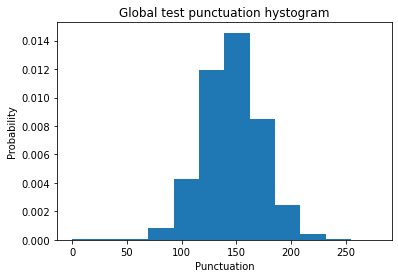

In [15]:
plt.hist(df['PUNT_GLOBALÂ'], bins=12, density=True)
plt.xlabel("Punctuation")
plt.ylabel("Probability")
plt.title("Global test punctuation hystogram")
plt.show()

In general, the scores round 150 points and it seems the general range of a score moves from 100 to 200 points.With somme exceptions that are as low as 0 points and the maximun that is 250 points.

Now, I want to see the relation between the target variable and the categorical variables.

In [16]:
cat_cols=df.select_dtypes(include=['object']).copy().columns
def barplot(df,cat_column,target_column):
    '''
    INPUT:
    df - pandas dataframe
    cat_column - The categorical column we want to plot
    target_column - The column we want to predict or compare
        
    OUTPUT:
    x - a bar plot sorted by the average punctuation  
    '''
    a=df[[cat_column,target_column]]
    x=a.plot(kind='bar')
    #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
    
    
    #ver mi código del trabajo
    

    return x
def plotall(df,cat_cols,target_column):
    '''
    INPUT:
    df - pandas dataframe
    cat_cols - A list of categorical columns we want to measure
    target_column - The column we want to predict or compare
        
    OUTPUT:
    x - a bar plot sorted by the average punctuation per each categorical column  
    '''
    for i in cat_cols:
        barplot(df,i,target_column)
    return x        

In [ ]:
plotall(df,cat_cols,'PUNT_GLOBALÂ')

## Data preparation

For the other variables, I will create dummies, so they can be used to predict the target variable and show correlations.

I will keep only the variables that seem to have an impact in the final score.

In [ ]:
df2=df1[['ESTU_GENEROÂ','ESTU_TIENEETNIAÂ','ESTU_DEPTO_RESIDEÂ','ESTU_ESTADOCIVILÂ'
               ,'ESTU_VALORMATRICULAUNIVERSIDADÂ','ESTU_PAGOMATRICULABECAÂ','ESTU_COMOCAPACITOEXAMENSB11Â'
               ,'ESTU_CURSODOCENTESIESÂ','ESTU_CURSOIESAPOYOEXTERNOÂ','ESTU_CURSOIESEXTERNAÂ', 'ESTU_SIMULACROTIPOICFESÂ','ESTU_ACTIVIDADREFUERZOAREASÂ'
               ,'ESTU_ACTIVIDADREFUERZOGENERICÂ','ESTU_SEMESTRECURSAÂ','FAMI_EDUCACIONPADREÂ','FAMI_EDUCACIONMADREÂ','FAMI_OCUPACIONPADREÂ','FAMI_OCUPACIONMADREÂ'
               ,'FAMI_ESTRATOVIVIENDAÂ','FAMI_TIENEINTERNETÂ','FAMI_TIENECOMPUTADORÂ','FAMI_TIENELAVADORAÂ','FAMI_TIENEHORNOMICROOGASÂ','FAMI_TIENESERVICIOTVÂ'
               ,'FAMI_TIENEAUTOMOVILÂ','FAMI_TIENEMOTOCICLETAÂ','FAMI_TIENECONSOLAVIDEOJUEGOSÂ','FAMI_TRABAJOLABORPADREÂ','FAMI_TRABAJOLABORMADREÂ'
               ,'ESTU_PLANTELEDUCATIVOÂ','ESTU_PREGRADOEXAMENSPÂ','ESTU_UNPOSTGRADOÂ','ESTU_HORASSEMANATRABAJAÂ','FAMI_CUANTOSCOMPARTEBAÃ‘OÂ','ESTU_PAGOMATRICULAÂ'
               ,'ESTU_VLRULTIMOSEMESCURSADOÂ','ESTU_PRESENTACIONCASAÂ','INST_NOMBRE_INSTITUCIONÂ'
               ,'GRUPOREFERENCIAÂ','ESTU_PRGM_CODMUNICIPIOÂ','ESTU_NIVEL_PRGM_ACADEMICOÂ','ESTU_METODO_PRGMÂ','ESTU_NUCLEO_PREGRADOÂ','INST_CARACTER_ACADEMICOÂ','ESTU_PRIVADO_LIBERTADÂ'
               ,'PUNT_GLOBALÂ']].copy()

In [ ]:
cat_cols2=df2.select_dtypes(include=['object']).copy().columns

In [ ]:
def create_dummy_df(df2, cat_cols2, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [ ]:
df3 = create_dummy_df(df,cat_cols, dummy_na=True)

In [ ]:
df3.head()

## Answering the questions

### 1) Which are the socio-demographic variables that most influence the results in the test?
To answer this question I will use a linear regression model to predict the result of the test according to the categorical variables

In [ ]:
def clean_fit_linear_mod(df3, col, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string with the name of the target column 
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    Your function should:
    1. Drop the rows with missing response values
    2. Fill the mean of the column for any missing values 
    5. Split your data into an X matrix and a response vector y
    6. Create training and test sets of data
    7. Instantiate a LinearRegression model with normalized data
    8. Fit your model to the training data
    9. Predict the response for the training data and the test data
    10. Obtain an rsquared value for both the training and test data
    '''

    #Drop the rows with missing response values
    df  = df.dropna(subset=[col], axis=0)
    y=df[col]
    #Drop respondent and expected salary columns
    df = df.drop([col], axis=1)
    # Mean function
    fill_mean = lambda x: x.fillna(x.mean())
    # Fill the mean
    df = df.apply(fill_mean, axis=0)
    #Split into explanatory and response variables
    X=df
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)
    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit
    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)
    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)
    return X,y,test_score, train_score, lm_model#, X_train, X_test, y_train, y_test

In [ ]:
#Use the function to create X and y
X,y,test_score,train_scroe,model= clean_fit_linear_mod(df2,'PUNT_GLOBALÂ')

In [ ]:
X

In [ ]:
# Get the coefficient of each variable
coefficients = model.coef_
variables=pd.DataFrame()
variables['Column']=X.columns
variables['Coefficient']=coefficients


# Sort the coefficients in descending order
variables.sort_values(by='Coefficient',inplace=True)

In [ ]:
variables2=variables.head(10).append(variables.tail(10))

In [ ]:
variables2

In [ ]:
# Plot the tornado diagram
plt.figure()
plt.barh(variables2.Column, variables2.Coefficient, color='blue')
plt.xlabel('Coefficient')
plt.ylabel('Variable')
plt.title('Tornado Diagram of Coefficients for Multiple Linear Regression Model')
plt.show()

In [ ]:
TCM_rating=TCM[TCM['variable_1']=='Final_Rate'].copy()

In [ ]:
TCM_rating.sort_values(by='r',inplace=True)
TCM_rating

In [ ]:
plt.figure()
plt.barh(TCM_rating.variable_2 ,TCM_rating.r, color='blue')
plt.xlabel('Correlation')
plt.ylabel('Variable')
plt.title('Correlation between Final Rate and numerical variables')
plt.xticks(rotation=0)
plt.show()

model